In [25]:
#over here we import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [26]:
#read the data
data=pd.read_csv("train.csv")
print("\nThe dimensions before pre-processing is done is: ",data.shape)


The dimensions before pre-processing is done is:  (21263, 82)


In [27]:
#By using the .duplicated() we will find the duplicates and using the drop_duplicates we drop the repeating rows
print("\nNumber of duplicated rows:\n",data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(data.info())


Number of duplicated rows:
 70
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21193 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21193 non-null  int64  
 1   mean_atomic_mass                 21193 non-null  float64
 2   wtd_mean_atomic_mass             21193 non-null  float64
 3   gmean_atomic_mass                21193 non-null  float64
 4   wtd_gmean_atomic_mass            21193 non-null  float64
 5   entropy_atomic_mass              21193 non-null  float64
 6   wtd_entropy_atomic_mass          21193 non-null  float64
 7   range_atomic_mass                21193 non-null  float64
 8   wtd_range_atomic_mass            21193 non-null  float64
 9   std_atomic_mass                  21193 non-null  float64
 10  wtd_std_atomic_mass              21193 non-null  float64
 11  mean_fie                         21193 non-null 

In [28]:
#we do the data preprocessing over here
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [29]:
#we call the above defiened method to clean our data set.
clean_dataset(data)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4.0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1.0,1.085714,0.433013,0.437059,29.00
1,5.0,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2.0,1.128571,0.632456,0.468606,26.00
2,4.0,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1.0,1.114286,0.433013,0.444697,19.00
3,4.0,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1.0,1.100000,0.433013,0.440952,22.00
4,4.0,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1.0,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4.0,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1.0,2.168889,0.433013,0.496904,2.44
21259,5.0,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1.0,0.904762,0.400000,0.212959,122.10
21260,2.0,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1.0,3.200000,0.500000,0.400000,1.98
21261,2.0,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1.0,2.210000,0.500000,0.462493,1.84


In [30]:
#Over here we declare a variable A as 81 so as to traverse through all the 81 columns.
A = 81;
B = 1;
 #We declare a function to find the score of each column individually wrt the output.
def part1():
    global A, B;
    if (B <= A):
      sc = data.iloc[:,B]
      crit_temp = data['critical_temp']
       #The output to which we compare the predicted value.
      x_train,x_test,y_train,y_test = train_test_split(sc,crit_temp,test_size = 1/3)
      x_train2 = x_train.values.reshape(-1, 1)#splitting the data set to training and testing set to find the score.
      x_test2 = x_test.values.reshape(-1, 1)
      y_train2 = y_train.values.reshape(-1, 1)
      y_test2 = y_test.values.reshape(-1, 1)
      reg = LinearRegression().fit(x_train2, y_train2)
      reg_score = reg.score(x_train2, y_train2)
      print(reg_score,B)
      B += 1; #we go to the next column.
      part2();
    else:
        return;
def part2():
    global A, B;
    if (B <= A):
        sc = data.iloc[:,B]
        crit_temp = data['critical_temp'] #The output to which we compare the predicted value
        x_train,x_test,y_train,y_test = train_test_split(sc,crit_temp,test_size = 1/3)
        x_train2 = x_train.values.reshape(-1, 1)
        x_test2 = x_test.values.reshape(-1, 1)
        y_train2 = y_train.values.reshape(-1, 1)
        y_test2 = y_test.values.reshape(-1, 1)
        reg = LinearRegression().fit(x_train2, y_train2)
        reg_score = reg.score(x_train2, y_train2)
        print(reg_score,B)
        B += 1;
        part1();
    else:
        return;

In [46]:
part1()#calling the above declared methods.

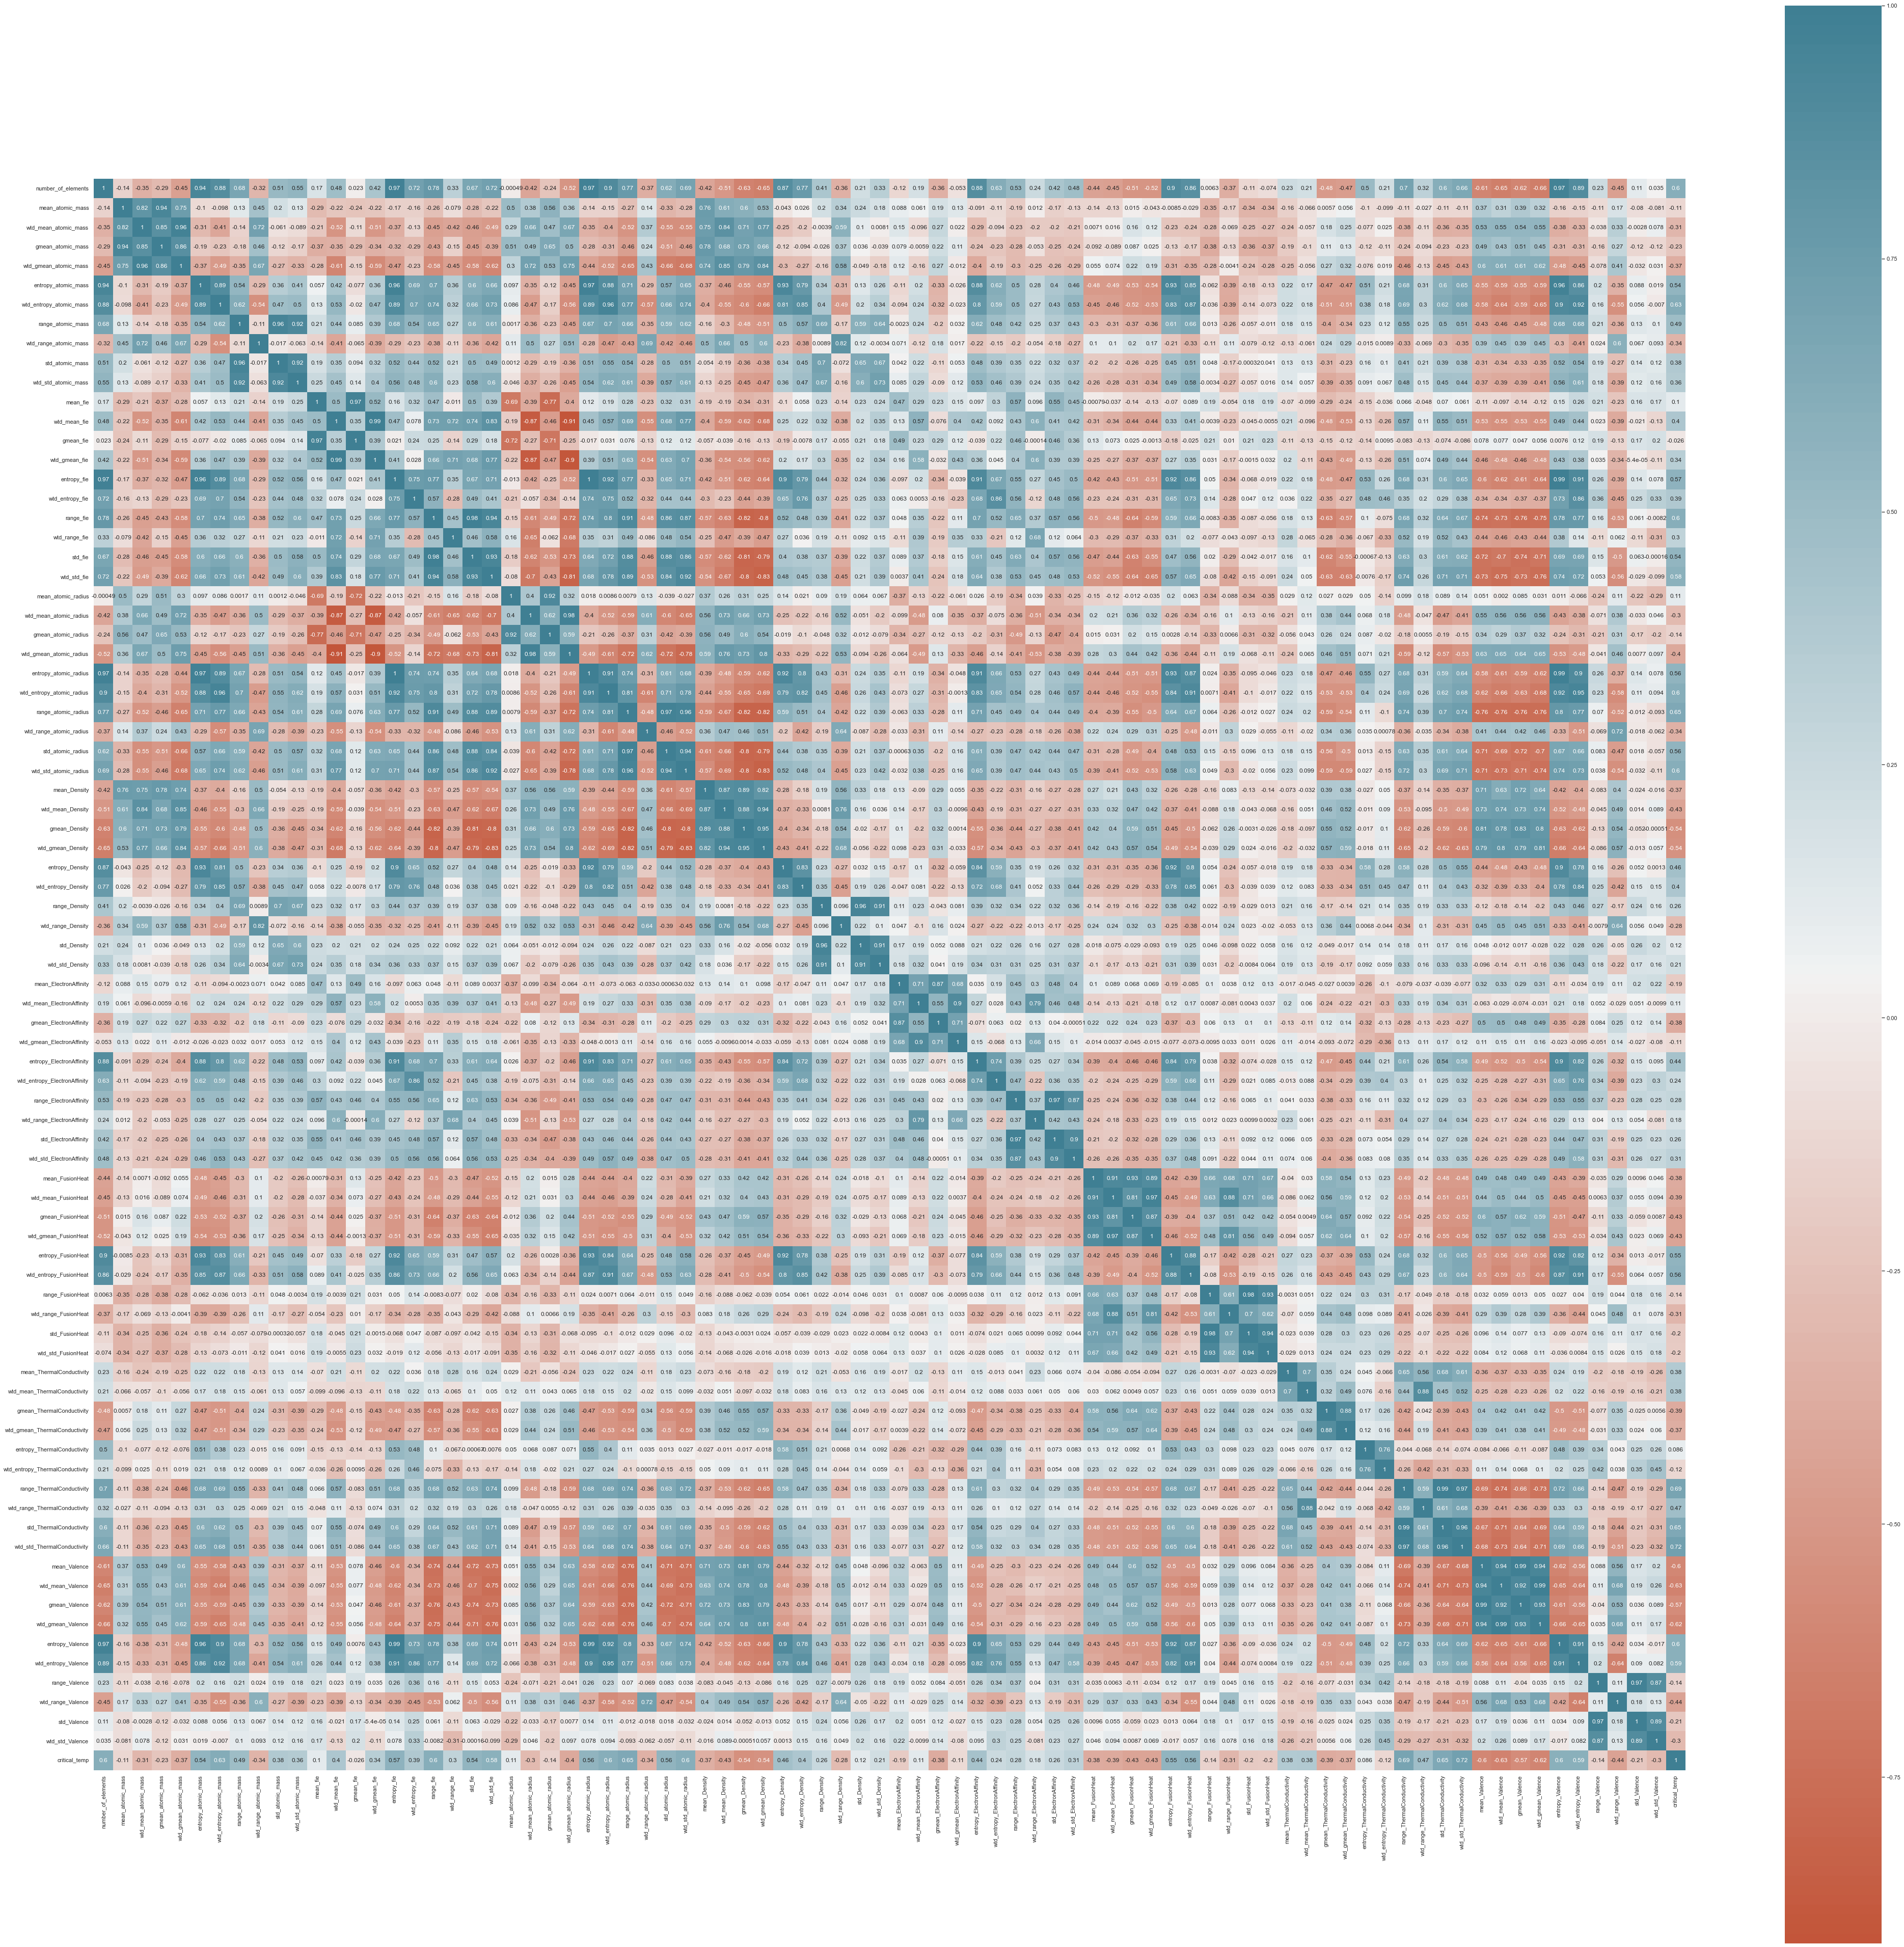

In [32]:
#plotting a heatmap to compare the dependency on the independent variables.
plt.figure(figsize=(70,70))
sns.heatmap(
    data.corr(),
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
);

In [33]:
lm=LinearRegression() #calling the linear regression model as lm

In [34]:
y= data['critical_temp']
out_put1_error =[]
out_put1_accuracy = []
for i in [ 'wtd_std_ThermalConductivity','wtd_entropy_atomic_mass','range_ThermalConductivity','range_atomic_radius','wtd_entropy_Valence','wtd_mean_Valence']:

  x1 = data[[i]]
  x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25, random_state=42)
  lm.fit(x_train,y_train)
  prediction = lm.predict(x_test)

  print()
  print("The root mean squared error when ",i," is used as an idependent variable is ", np.sqrt(mean_squared_error(y_test,prediction)))#by using MSE and numpy we are finding the mean squared error
  out_put1_error.append(np.sqrt(mean_squared_error(y_test,prediction)))
  print('accuracy of your prediction when',i,"is used as a independent variable for prediction is ",end=' ')#By using the r2_score we are finding the score of the attribute.
  print(r2_score(y_test,prediction)*100,end='')
  print('%')
  print("The intercept of the prediction when ",i," is used as the independent variables is",lm.intercept_)#by using the .intercept_ method we are finding the intercept of the final eqn.
  print("The slope of the prediction when",i," is used as the independent variables is",lm.coef_)#By using .coef_ method we are finding the coefficient of the independent variable considered.
  out_put1_accuracy.append(r2_score(y_test,prediction)*100)


The root mean squared error when  wtd_std_ThermalConductivity  is used as an idependent variable is  23.687281848942916
accuracy of your prediction when wtd_std_ThermalConductivity is used as a independent variable for prediction is  52.702543213930575%
The intercept of the prediction when  wtd_std_ThermalConductivity  is used as the independent variables is -2.9483252925355785
The slope of the prediction when wtd_std_ThermalConductivity  is used as the independent variables is [0.38737653]

The root mean squared error when  wtd_entropy_atomic_mass  is used as an idependent variable is  26.826854947283813
accuracy of your prediction when wtd_entropy_atomic_mass is used as a independent variable for prediction is  39.33379115041314%
The intercept of the prediction when  wtd_entropy_atomic_mass  is used as the independent variables is -22.784392519086822
The slope of the prediction when wtd_entropy_atomic_mass  is used as the independent variables is [53.61189436]

The root mean squared

C:\Users\naidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


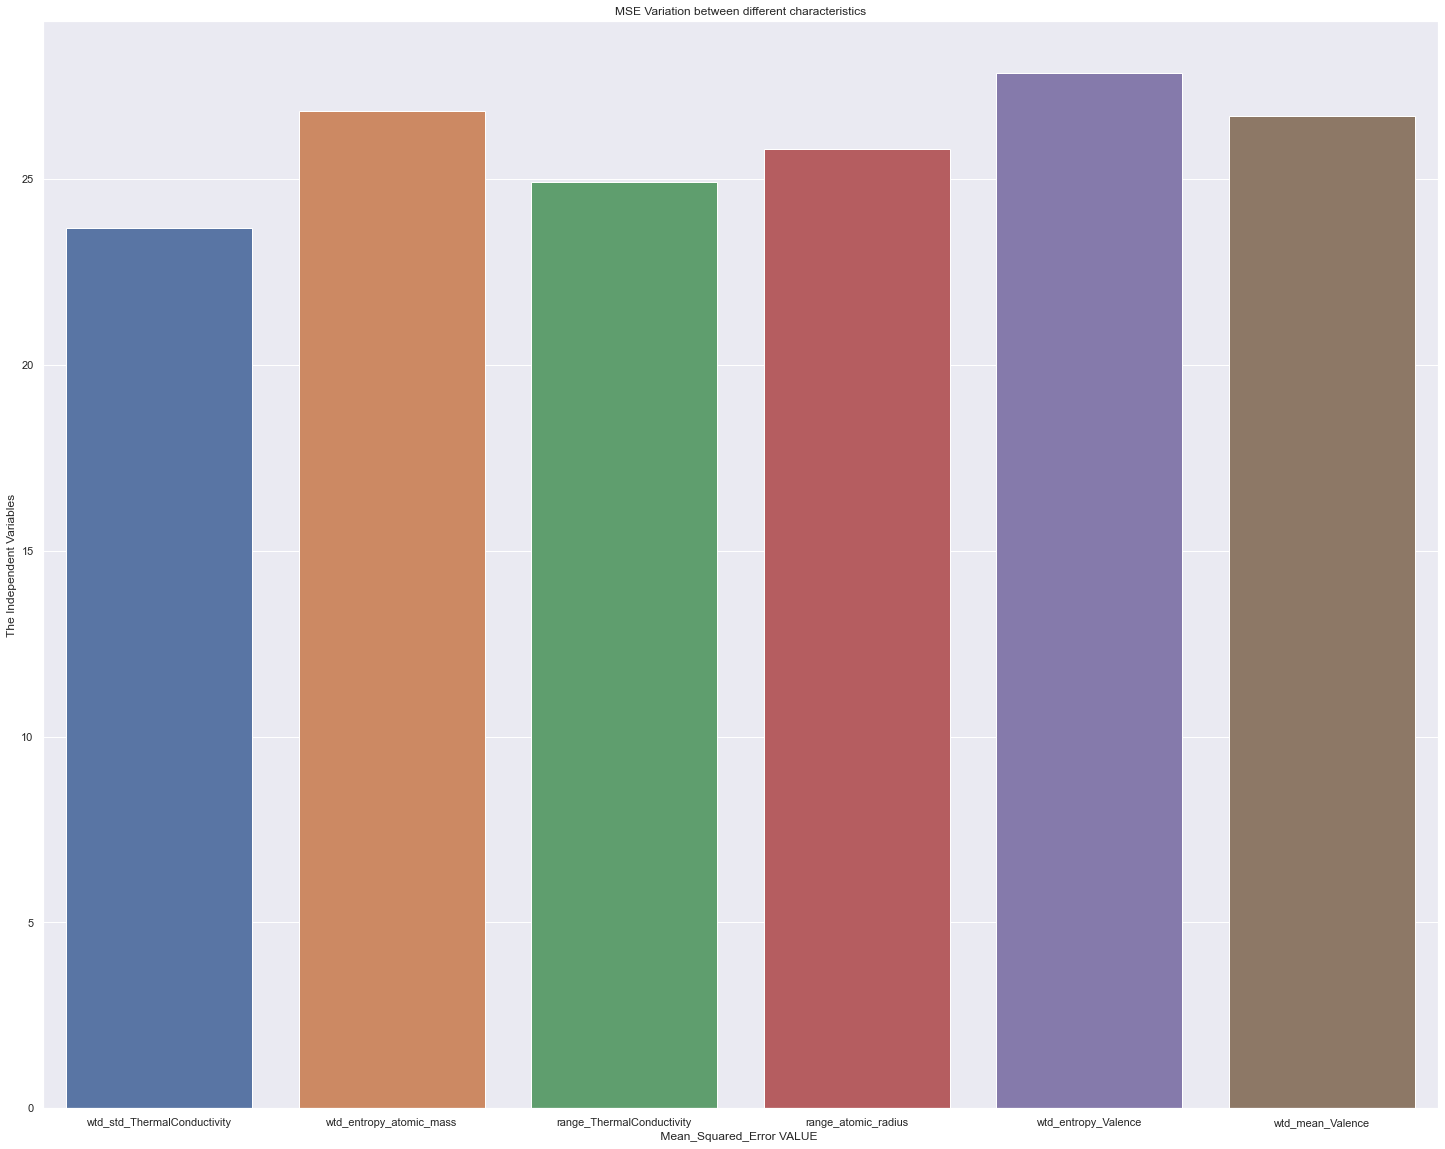

C:\Users\naidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


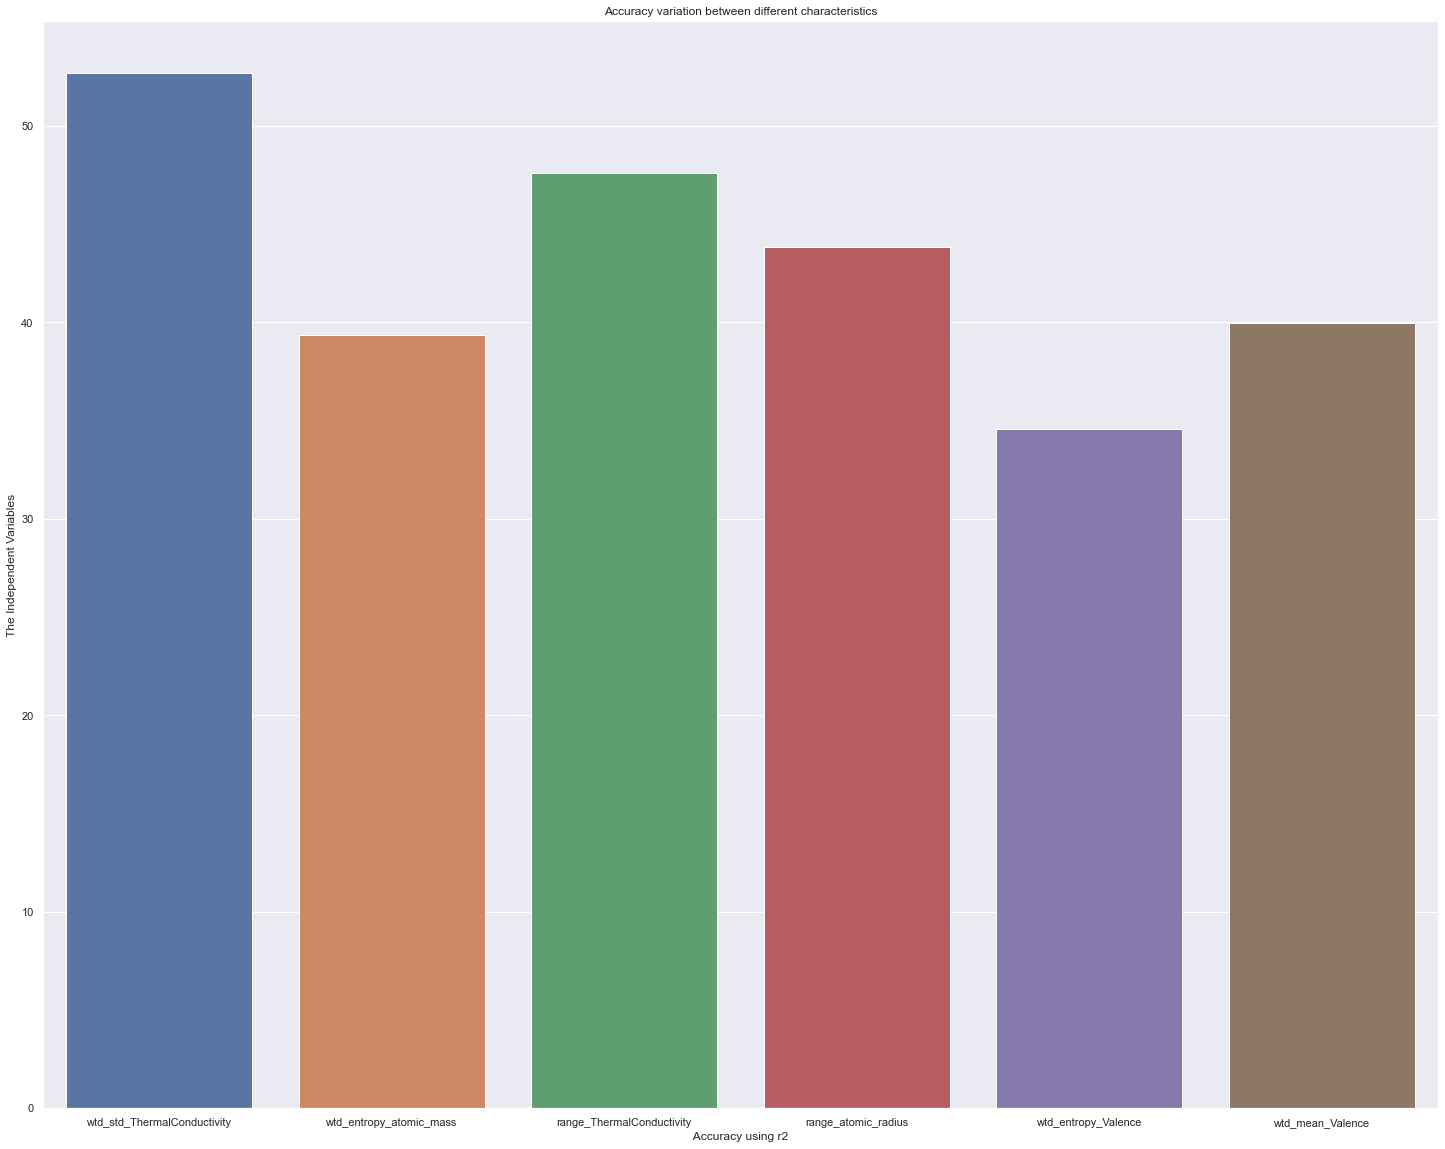

In [35]:
sns.set(rc={'figure.figsize':(25,20)})
sns.set_style('ticks')
sns.set(font_scale = 1)
x = [ 'wtd_std_ThermalConductivity','wtd_entropy_atomic_mass','range_ThermalConductivity','range_atomic_radius','wtd_entropy_Valence','wtd_mean_Valence']
y = out_put1_error
o = sns.barplot(x,y)
o.set_xlabel(" Mean_Squared_Error VALUE  ")
o.set_ylabel(" The Independent Variables ")
o.set_title("MSE Variation between different characteristics")
plt.show()
sns.set_style('ticks')
sns.set(font_scale = 1)
x = [ 'wtd_std_ThermalConductivity','wtd_entropy_atomic_mass','range_ThermalConductivity','range_atomic_radius','wtd_entropy_Valence','wtd_mean_Valence']
y = out_put1_accuracy
o = sns.barplot(x,y)
o.set_xlabel(" Accuracy using r2 ")
o.set_ylabel(" The Independent Variables ")
o.set_title("Accuracy variation between different characteristics")
plt.show()

In [36]:
x2= [ 'wtd_std_ThermalConductivity','wtd_entropy_atomic_mass','range_ThermalConductivity','range_atomic_radius','wtd_entropy_Valence','wtd_mean_Valence']
input1=[]
out_put_2_error=[]
out_put_2_accuracy =[]
for i in range(len(x2)-2+1):
  input1.append("set "+str(i+1))
  x21 = data[[x2[i],x2[i+1]]]
  y=data['critical_temp']
  x_train,x_test,y_train,y_test=train_test_split(x21,y,test_size=0.25, random_state=42)
  lm.fit(x_train,y_train)
  prediction = lm.predict(x_test)
  print("The rms value of error when ",x2[i],x2[i+1]," are taken as the independent variables is ",np.sqrt(mean_squared_error(y_test,prediction)))#by using MSE and numpy we are finding the mean squared error
  print("The accuracy of prediction when ",x2[i],",",x2[i+1]," are taken as the independent variables is",end=" ")#By using the r2_score we are finding the score of the attribute.
  print(r2_score(y_test,prediction)*100,end='')
  print('%')
  print("The intercept of the prediction when ",x2[i],",",x2[i+1]," are taken as the independent variables is",lm.intercept_)#by using the .intercept_ method we are finding the intercept of the final eqn.
  print("The slope/coefficient of the prediction when",x2[i],",",x2[i+1]," are taken as the independent variables is",lm.coef_)#By using .coef_ method we arefinding the coefficients of the independent variables considered.
  out_put_2_error.append(np.sqrt(mean_squared_error(y_test,prediction)))
  out_put_2_accuracy.append(r2_score(y_test,prediction)*100)
  print()

The rms value of error when  wtd_std_ThermalConductivity wtd_entropy_atomic_mass  are taken as the independent variables is  22.879770685571142
The accuracy of prediction when  wtd_std_ThermalConductivity , wtd_entropy_atomic_mass  are taken as the independent variables is 55.87236334199539%
The intercept of the prediction when  wtd_std_ThermalConductivity , wtd_entropy_atomic_mass  are taken as the independent variables is -17.01679235286739
The slope/coefficient of the prediction when wtd_std_ThermalConductivity , wtd_entropy_atomic_mass  are taken as the independent variables is [ 0.29446171 21.60051775]

The rms value of error when  wtd_entropy_atomic_mass range_ThermalConductivity  are taken as the independent variables is  23.815393964693868
The accuracy of prediction when  wtd_entropy_atomic_mass , range_ThermalConductivity  are taken as the independent variables is 52.189545285498575%
The intercept of the prediction when  wtd_entropy_atomic_mass , range_ThermalConductivity  are

C:\Users\naidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


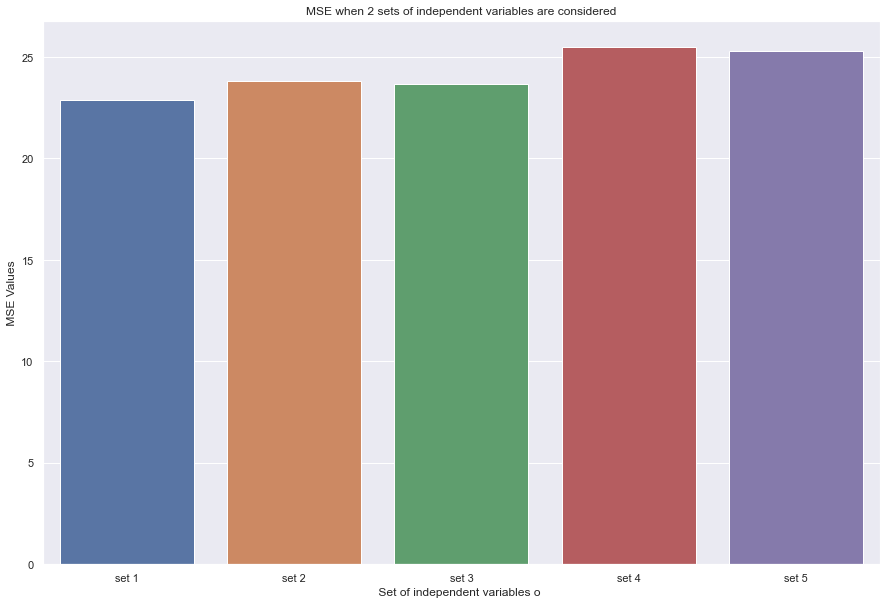

C:\Users\naidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


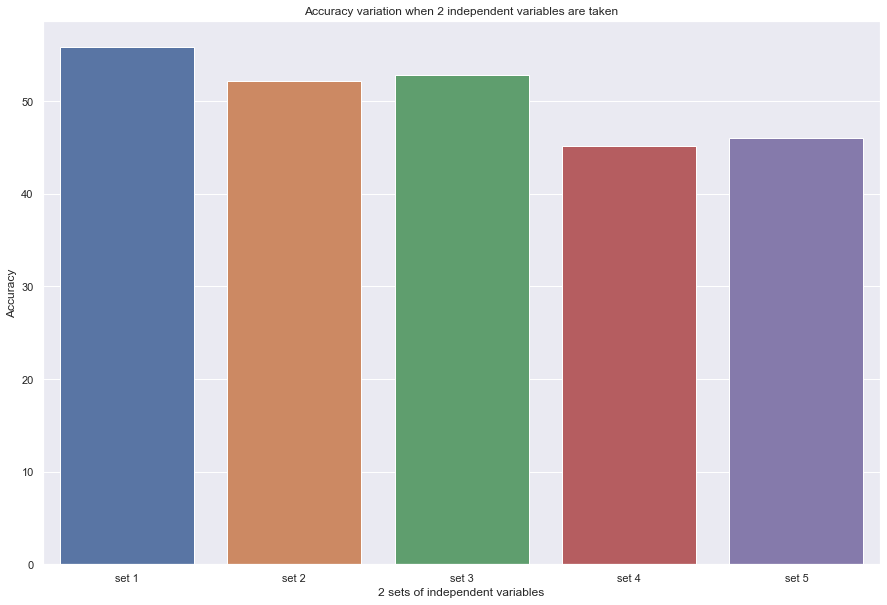

In [37]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('ticks')
sns.set(font_scale = 1)
y = out_put_2_error
x = input1
g = sns.barplot(x,y)
g.set_xlabel(" Set of independent variables o  ")
g.set_ylabel(" MSE Values ")
g.set_title("MSE when 2 sets of independent variables are considered")
plt.show()
sns.set_style('ticks')
sns.set(font_scale = 1)
y = out_put_2_accuracy
g = sns.barplot(x,y)
g.set_xlabel("2 sets of independent variables")
g.set_ylabel("Accuracy")
g.set_title("Accuracy variation when 2 independent variables are taken")
plt.show()

In [38]:
x2= [ 'wtd_std_ThermalConductivity','wtd_entropy_atomic_mass','wtd_gmean_ElectronAffinity','wtd_std_ElectronAffinity','wtd_entropy_Valence','wtd_range_Valence']
input1=[]
out_put3_MSE = []
out_put3_Accuracy=[]
for i in range(len(x2)-3+1):
  input1.append("set "+str(i+1))
  x21 = data[[x2[i],x2[i+1],x2[i+2]]]
  y=data['critical_temp']
  x_train,x_test,y_train,y_test=train_test_split(x21,y,test_size=0.25, random_state=42)
  lm.fit(x_train,y_train)
  prediction = lm.predict(x_test)
  print("The rms value of error when ",x2[i],",",x2[i+1],",",x2[i+2]," are taken as the independent variables is ",np.sqrt(mean_squared_error(y_test,prediction)))
  print("The accuracy of prediction when ",x2[i],",",x2[i+1],",",x2[i+2]," are taken as the independent variables is",end=" ")
  print(r2_score(y_test,prediction)*100,end='')
  print('%')
  print("The intercept of the prediction when ",x2[i],",",x2[i+1],",",x2[i+2]," are taken as the independent variables is",lm.intercept_)#by using the .intercept_ method we are finding the intercept of the final eqn.
  print("The slope/coefficient of the prediction when",x2[i],",",x2[i+1],",",x2[i+2]," are taken as the independent variables is",lm.coef_)#By using .coef_ method we arefinding the coefficients of the independent variables considered.
  out_put3_MSE.append(np.sqrt(mean_squared_error(y_test,prediction)))
  print()
  out_put3_Accuracy.append(r2_score(y_test,prediction))

The rms value of error when  wtd_std_ThermalConductivity , wtd_entropy_atomic_mass , wtd_gmean_ElectronAffinity  are taken as the independent variables is  22.126851314902535
The accuracy of prediction when  wtd_std_ThermalConductivity , wtd_entropy_atomic_mass , wtd_gmean_ElectronAffinity  are taken as the independent variables is 58.72885014713552%
The intercept of the prediction when  wtd_std_ThermalConductivity , wtd_entropy_atomic_mass , wtd_gmean_ElectronAffinity  are taken as the independent variables is -2.4119725908467586
The slope/coefficient of the prediction when wtd_std_ThermalConductivity , wtd_entropy_atomic_mass , wtd_gmean_ElectronAffinity  are taken as the independent variables is [ 0.3190206  18.50980627 -0.18885419]

The rms value of error when  wtd_entropy_atomic_mass , wtd_gmean_ElectronAffinity , wtd_std_ElectronAffinity  are taken as the independent variables is  26.619894898750935
The accuracy of prediction when  wtd_entropy_atomic_mass , wtd_gmean_ElectronAffi

C:\Users\naidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


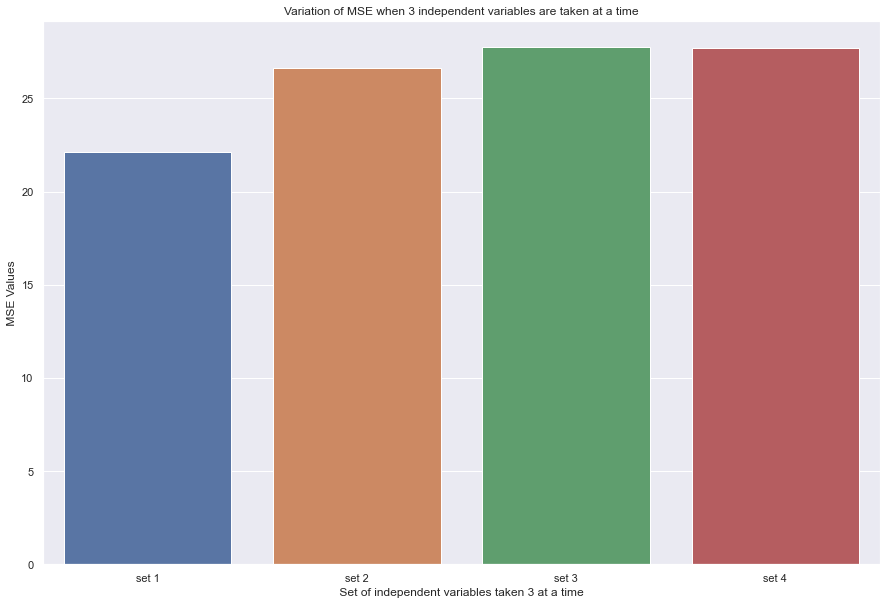

C:\Users\naidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Accuracy when 3 independent variables are taken at a time')

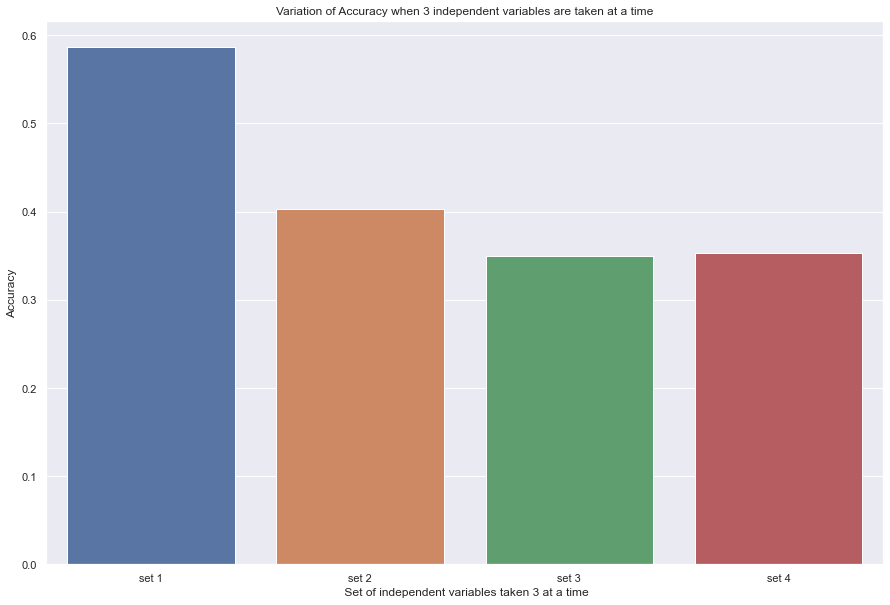

In [39]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('ticks')
sns.set(font_scale = 1)
y=out_put3_MSE
x=input1
g=sns.barplot(x,y)
g.set_xlabel(" Set of independent variables taken 3 at a time ")
g.set_ylabel(" MSE Values ")
g.set_title("Variation of MSE when 3 independent variables are taken at a time")
plt.show()

y = out_put3_Accuracy
g = sns.barplot(x,y)
g.set_xlabel(" Set of independent variables taken 3 at a time")
g.set_ylabel("Accuracy")
g.set_title("Variation of Accuracy when 3 independent variables are taken at a time")

The RMS error when every independent variables are used for prediction is  22.05095281278097
accuracy of your prediction whwn every independent variable is considered for prediction is 58.74876579125768%


C:\Users\naidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


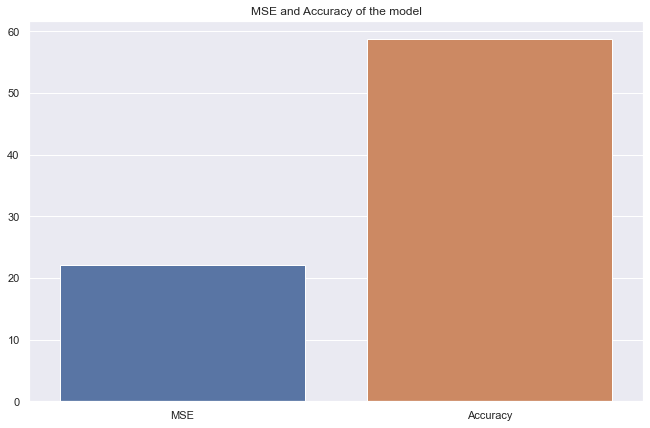

2.4922964728983388
[  0.32562531  28.46374848  -0.20412136   0.05337265 -15.38468244
  -0.77516722]
The predicted critical temperature is: [42.57046188]


C:\Users\naidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\naidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [40]:
from pandas.core.dtypes.cast import NumpyArrayT
x=data[[ 'wtd_std_ThermalConductivity','wtd_entropy_atomic_mass','wtd_gmean_ElectronAffinity','wtd_std_ElectronAffinity','wtd_entropy_Valence','wtd_range_Valence']]
y=data['critical_temp']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=40)
lm.fit(x_train,y_train)
prediction = lm.predict(x_test)
print("The RMS error when every independent variables are used for prediction is ",np.sqrt(mean_squared_error(y_test,prediction)))
print('accuracy of your prediction whwn every independent variable is considered for prediction is',end=' ')
print(r2_score(y_test,prediction)*100,end='')
print('%')

sns.set(rc={'figure.figsize':(11,7)})
sns.set_style('ticks')
sns.set(font_scale = 1)
y=[np.sqrt(mean_squared_error(y_test,prediction)),r2_score(y_test,prediction)*100]
x = ['MSE','Accuracy']
o=sns.barplot(x,y)
o.set_title("MSE and Accuracy of the model")
plt.show()
print(lm.intercept_)
print(lm.coef_)

wtd_std_ThermalConductivity = input('Enter the wtd_std_ThermalConductivity value')
wtd_entropy_atomic_mass = input('Enter the wtd_entropy_atomic_mass')
wtd_gmean_ElectronAffinity = input('Enter the wtd_gmean_ElectronAffinity')
wtd_std_ElectronAffinity = input('Enter the wtd_std_ElectronAffinity')
wtd_entropy_Valence = input('Enter the wtd_entropy_Valence')
wtd_range_Valence = input('Enter the wtd_range_Valence')
val = np.array([[wtd_std_ThermalConductivity,wtd_entropy_atomic_mass,wtd_gmean_ElectronAffinity,wtd_std_ElectronAffinity,wtd_entropy_Valence,wtd_range_Valence]])
ans = lm.predict(val)
print('The predicted critical temperature is:',ans)
#wtd_std_ThermalConductivity = 138.5171625
#wtd_entropy_atomic_mass = 1.062395545
#wtd_gmean_ElectronAffinity=99.41468205
#wtd_std_ElectronAffinity = 42.55839575
#wtd_entropy_Valence = 1.066221032
#wtd_range_Valence = 1.085714286
#critical temperature = 30